In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

# **1. Import dataset & EDA**

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()



train_labels, count_train_labels = np.unique(y_train, return_counts = True)
train_set = dict(zip(train_labels, count_train_labels))


test_labels, count_test_labels = np.unique(y_test, return_counts = True)
test_set = dict(zip(test_labels, count_test_labels))

print('Train Lables')
for label, count in train_set.items():
    print(f'Digit {label}: {count} samples')
print(f'Total samples: {y_train.shape[0]}')

print('\nTest Lables')
for label, count in test_set.items():
    print(f'Digit {label}: {count} samples')
print(f'Total samples: {y_test.shape[0]}')


Train Lables
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples
Total samples: 60000

Test Lables
Digit 0: 980 samples
Digit 1: 1135 samples
Digit 2: 1032 samples
Digit 3: 1010 samples
Digit 4: 982 samples
Digit 5: 892 samples
Digit 6: 958 samples
Digit 7: 1028 samples
Digit 8: 974 samples
Digit 9: 1009 samples
Total samples: 10000


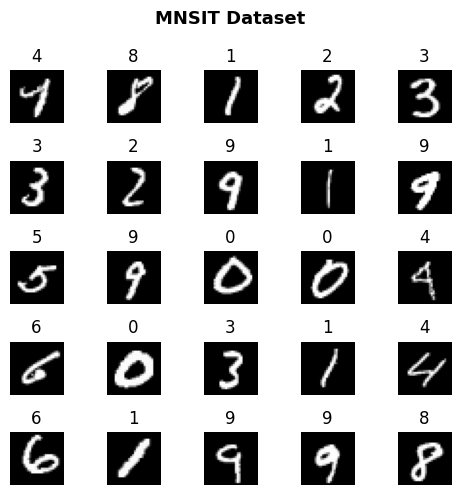

In [3]:
np.random.seed(12345)
index = np.random.randint(0, X_train.shape[0], size = 25)
images = X_train[index]
labels = y_train[index]

plt.figure(figsize = (5,5))
plt.suptitle('MNSIT Dataset', fontsize = 13, fontweight = 'bold')

for i in range(len(index)):
    plt.subplot(5, 5, i+1)
    img = images[i]
    plt.imshow(img, cmap = 'gray')
    plt.title(labels[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

# **2. MLP Design**

## Data Preprocessing

In [4]:
num_labels = len(np.unique(y_train))

# One Hot Encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalize input data to speed up learning process
img_size = X_train.shape[1]
input_size = img_size * img_size

X_train = np.reshape(X_train, [-1, input_size])
X_train = X_train.astype('float32')/255

X_test = np.reshape(X_test, [-1, input_size])
X_test = X_test.astype('float32')/255

## Model Hyperparameters

In [5]:
# Netweork Parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

## Network Architecture

In [ ]:
# 3 Layer MLP: 784-256-10
mlp = Sequential()
mlp.add(Dense(hidden_units, input_dim = input_size))
mlp.add(Activation('relu'))
mlp.add(Dropout(dropout))
mlp.add(Dense(hidden_units))
mlp.add(Activation('relu'))
mlp.add(Dropout(dropout))
mlp.add(Dense(num_labels))
mlp.add(Activation('softmax'))

In [10]:
num_labels

10